In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
import re
from bs4 import BeautifulSoup
from konlpy.tag import Okt

In [19]:
driver = webdriver.Chrome(executable_path='./chromedriver.exe')
driver.execute_cdp_cmd("Page.addScriptToEvaluateOnNewDocument", {"source": """ Object.defineProperty(navigator, 'webdriver', { get: () => undefined }) """})
url = 'http://www.paxnet.co.kr/tbbs/list?tbbsType=L&id=N00801'
driver.get(url)
time.sleep(4)

content = ''
parentTiele = driver.find_element(By.CLASS_NAME,"comm-list")
list_title = driver.find_elements(By.CLASS_NAME,"best-title")
parentElement = driver.find_element(By.CLASS_NAME,"paging")
page = parentElement.find_elements(By.TAG_NAME,'li')

for p in range(1,len(page)):
    print(p,'페이지 수집중...')
    if p != 1:
        driver.find_element(By.XPATH,r'//*[@id="cont-area"]/div/div[2]/ul/li['+str(p)+']/a').send_keys(Keys.ENTER)
    for i in range(4,len(list_title)+2):
        time.sleep(2)
        driver.find_element(By.XPATH,r'//*[@id="comm-list"]/li['+str(i)+']/div[2]/p/a').send_keys(Keys.ENTER)
        time.sleep(2)
        sub_content = driver.find_element(By.CLASS_NAME,"board-view-cont")
        content += sub_content.text
        driver.back()
    print(p,'페이지 수집 완료!!')
print('데이터 수집 완료')

C:\Users\big303\AppData\Local\Temp\ipykernel_11252\163785758.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='./chromedriver.exe')


1 페이지 수집중...
1 페이지 수집 완료!!
2 페이지 수집중...
2 페이지 수집 완료!!
3 페이지 수집중...
3 페이지 수집 완료!!
4 페이지 수집중...
4 페이지 수집 완료!!
데이터 수집 완료


In [17]:
from collections import Counter

In [43]:
okt = Okt()
pos_word = okt.pos(content)
#print(pos_word)
non_word = []
count_word = {}
for word, value in pos_word:
    if value == 'Noun' or value == 'Adjective':
        if len(word) > 1:
            non_word.append(word)
counts = Counter(non_word)
for key, value in counts.items():
    if value >= 10:
        print(key,':',value)
top_100 = counts.most_common(100)
with open('example.txt', 'w', encoding='utf-8') as my_file:
    for T in top_100:
        my_file.write(T[0])
        my_file.write(str(T[1]))
        my_file.writelines('\n')

매수 : 17
공유 : 105
코스피 : 10
지금 : 10
주가 : 14
종목 : 14
옵션 : 11
지수 : 12
상승 : 13
하락 : 13
시장 : 31
사람 : 12
금리 : 30
기업 : 13
한국 : 14
경제 : 10
인상 : 15
입니다 : 19
폭락 : 26
환율 : 10
바닥 : 12
반등 : 13
일본 : 10
주식 : 25
달러 : 12
오늘 : 13
발표 : 14
미국 : 29
만기일 : 13
로봇 : 23
감속 : 13
티피 : 17
글로벌 : 10


In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

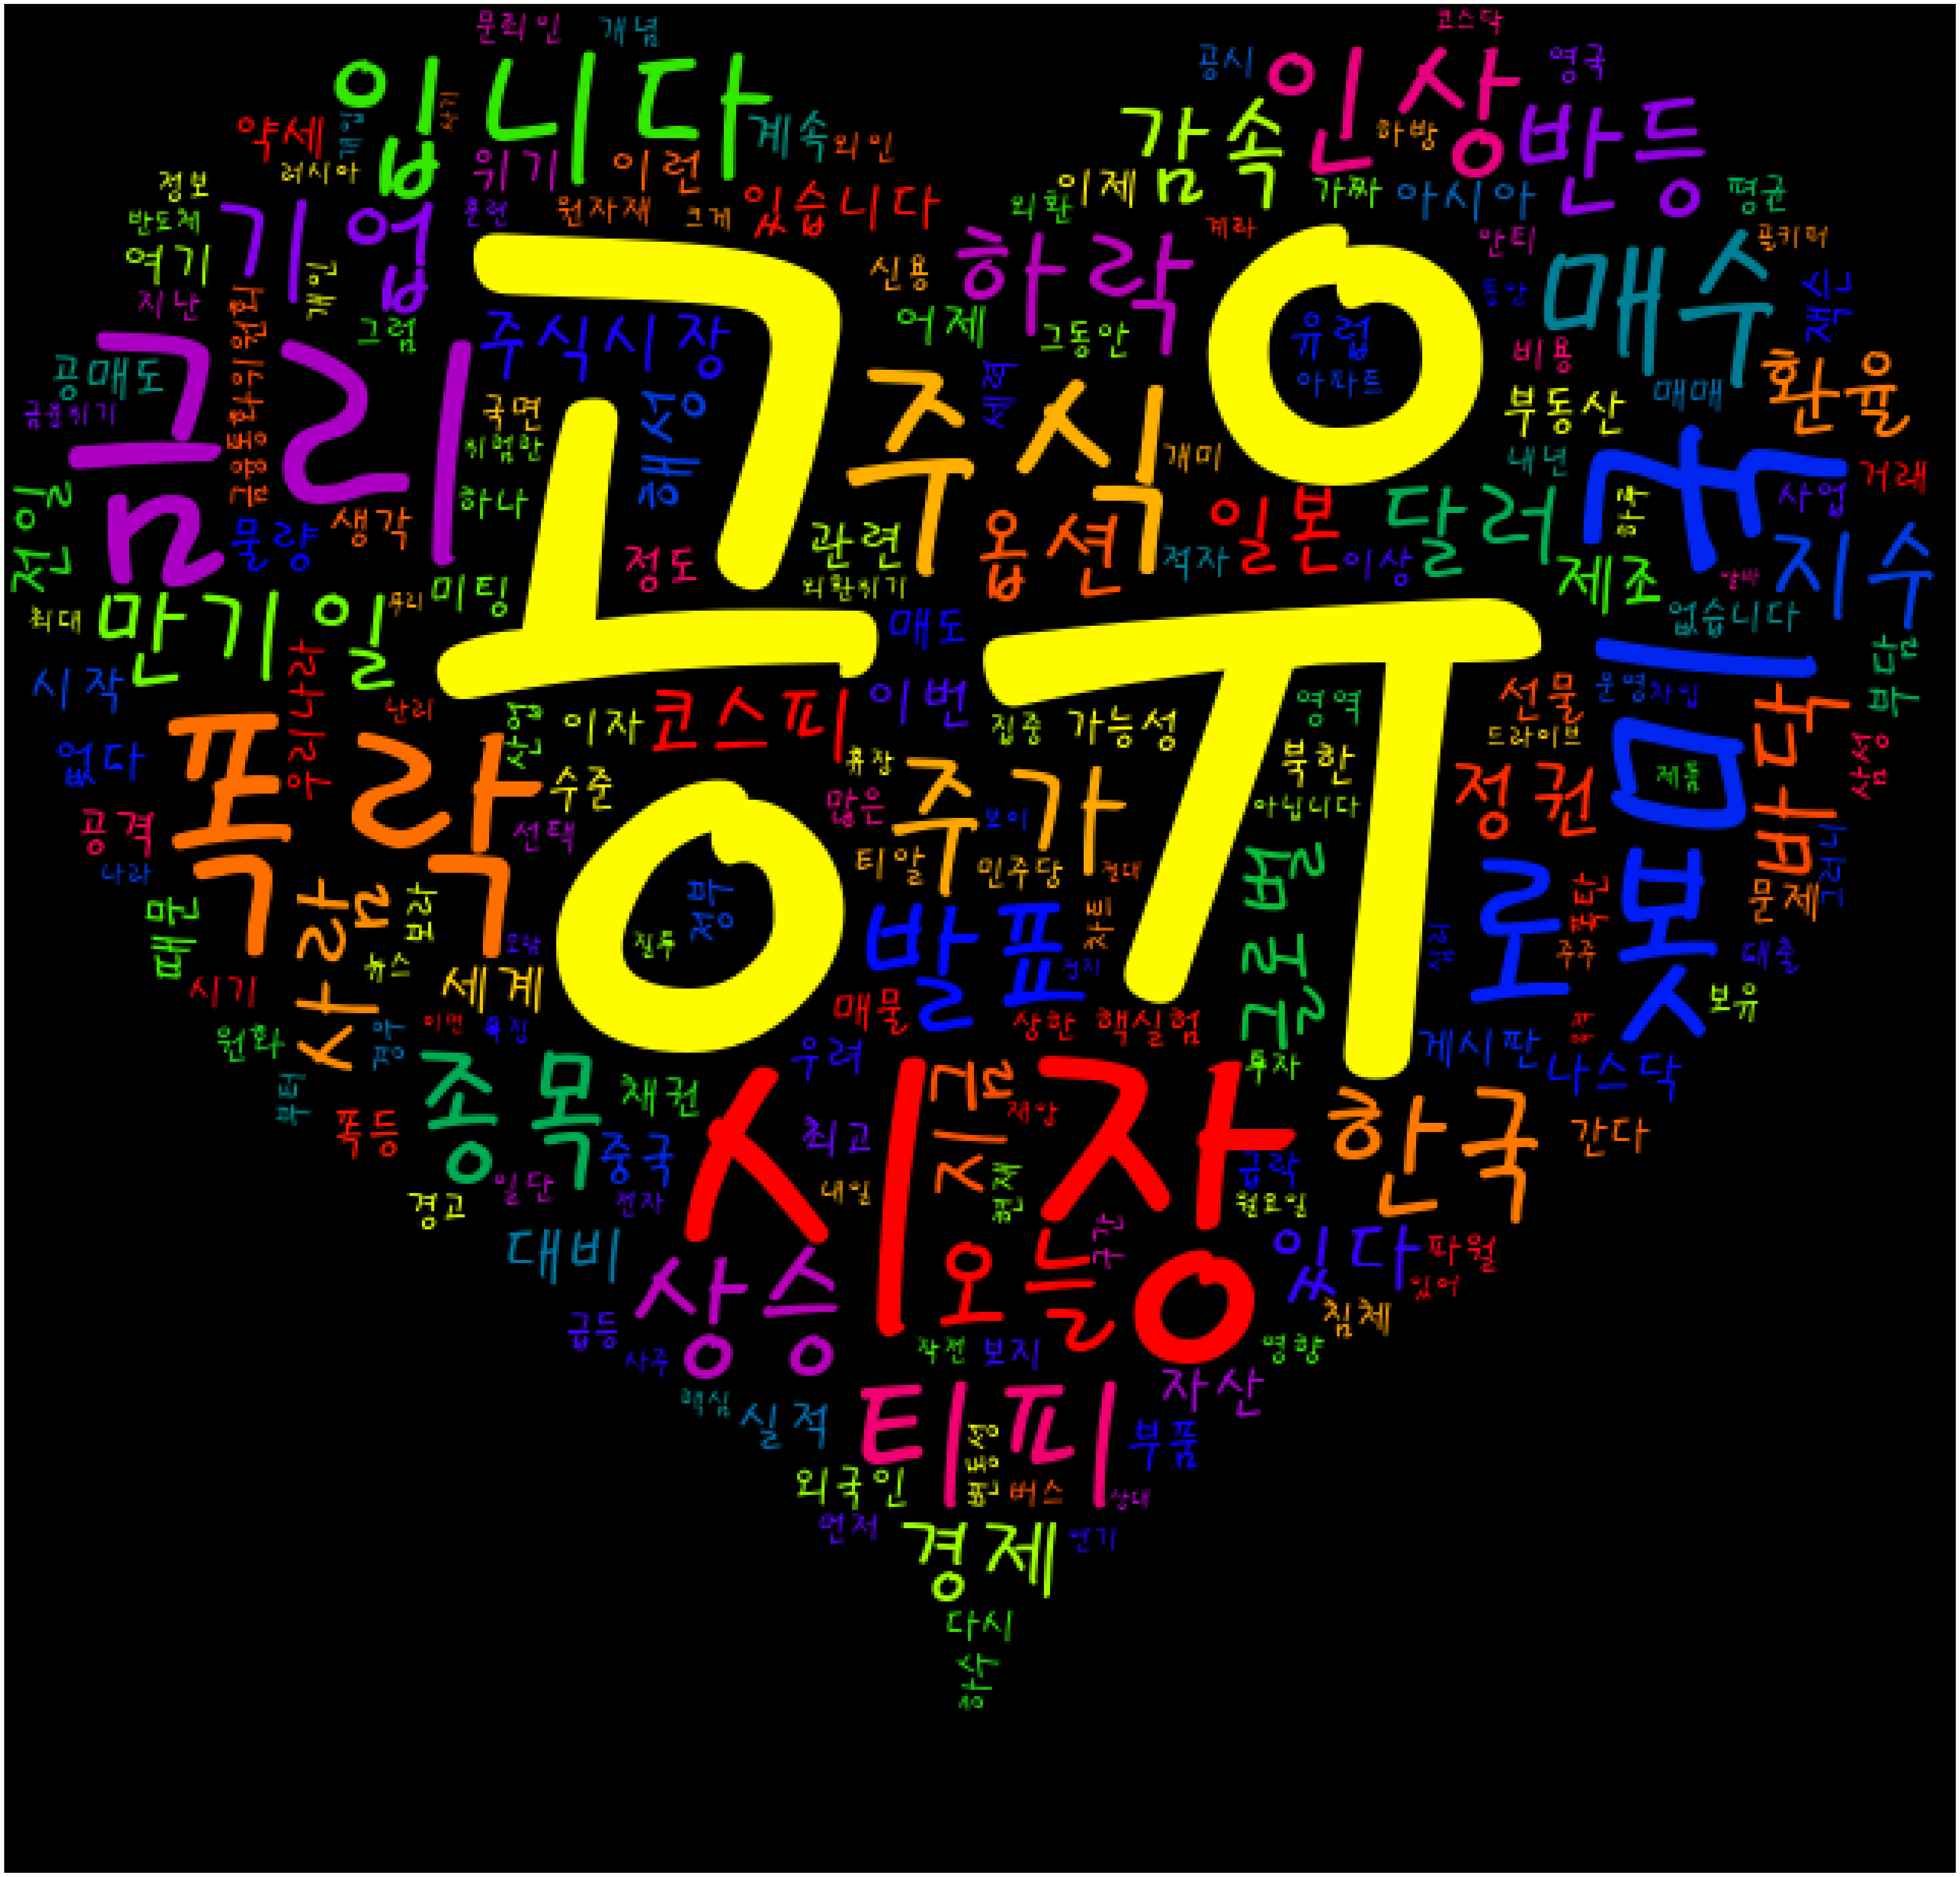

In [55]:
path = 'C:\Windows\Fonts\HMFMPYUN.TTF'
mask = Image.new("RGBA",(640,613), (255,255,255)) #(2555,2575)는 사진 크기, (255,255,255)는 색을의미
image = Image.open('heart.png').convert("RGBA")
x,y = image.size
mask.paste(image,(0,0,x,y),image)
mask = np.array(mask)

word_cloud = WordCloud(font_path=path, background_color='black',max_font_size=400, mask=mask,colormap='prism').generate_from_frequencies(dict(counts))
plt.figure(figsize=(60,60), dpi=150)
plt.imshow(word_cloud)
plt.axis('off')
plt.savefig('Heart_Story.png', bbox_inches='tight', dpi=100)
plt.show()

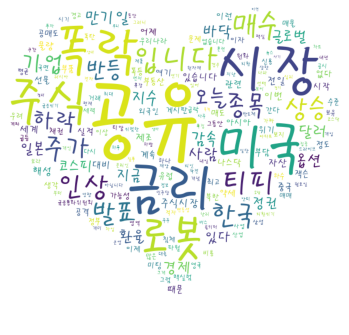

In [62]:
from PIL import Image
import numpy as np
 
im = Image.open('heart.png').convert("RGBA") # 이미지 파일 읽어오기
mask_arr = np.array(im) # 픽셀 값 배열 형태 변환

wordcloud = WordCloud(font_path=path, background_color ='white',
                      width = 700, height = 700, mask = mask_arr,
                      prefer_horizontal = True).generate_from_frequencies(dict(counts))

plt.figure(figsize = (6, 6))  
plt.imshow(wordcloud)

plt.axis('off')

plt.show()